In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os, glob
import random

In [2]:
df_category_combined = pd.read_csv('./Anno/changed/etri/category_combined.csv')

In [3]:
df_attr_combined = pd.read_csv('./Anno/changed/etri/attr_combined.csv')

In [4]:
df_attr_combined.head()

,image_name,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,Sheer_Pleated-Front_Blouse_img_00000001,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,Sheer_Pleated-Front_Blouse_img_00000002,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,Sheer_Pleated-Front_Blouse_img_00000003,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,Sheer_Pleated-Front_Blouse_img_00000004,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,Sheer_Pleated-Front_Blouse_img_00000005,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [5]:
df_category_combined.head()

,category_label,category_name,category_type,image_name
0,1,Anorak,1,Hooded_Cotton_Canvas_Anorak_img_00000001
1,1,Anorak,1,Hooded_Cotton_Canvas_Anorak_img_00000002
2,1,Anorak,1,Hooded_Cotton_Canvas_Anorak_img_00000003
3,1,Anorak,1,Hooded_Cotton_Canvas_Anorak_img_00000004
4,1,Anorak,1,Hooded_Cotton_Canvas_Anorak_img_00000005


In [6]:
lst_coat_fname = [f.name[:-4] for f in os.scandir('./coat') if f.is_file()]
lst_dress_fname = [f.name[:-4] for f in os.scandir('./dress') if f.is_file()]
lst_jacket_fname = [f.name[:-4] for f in os.scandir('./jacket') if f.is_file()]
lst_jumper_fname = [f.name[:-4] for f in os.scandir('./jumper') if f.is_file()]
lst_pants_fname = [f.name[:-4] for f in os.scandir('./pants') if f.is_file()]
lst_shirt_fname = [f.name[:-4] for f in os.scandir('./shirt') if f.is_file()]
lst_skirt_fname = [f.name[:-4] for f in os.scandir('./skirt') if f.is_file()]
lst_winterJacket_fname = [f.name[:-4] for f in os.scandir('./winter jacket') if f.is_file()]

In [7]:
def createCategoryDataFrame(lst_category_fname, category_label, category_name):
    
    df_category = pd.DataFrame(lst_category_fname, columns=['image_name'])
    df_category.insert(1,'category_label', category_label)
    df_category.insert(1,'category_name', category_name)

    return df_category

In [8]:
df_shirt = createCategoryDataFrame(lst_shirt_fname, 0, 'shirt')
df_jumper = createCategoryDataFrame(lst_jumper_fname, 1, 'jumper')
df_jacket = createCategoryDataFrame(lst_jacket_fname, 2, 'jacket')
#df_vest = createCategoryDataFrame(lst_vest_fname, 3, 'Vest')
df_winterJacket = createCategoryDataFrame(lst_winterJacket_fname, 4, 'winter jacket')
df_coat = createCategoryDataFrame(lst_coat_fname, 5, 'coat')
df_dress = createCategoryDataFrame(lst_dress_fname, 6, 'dress')
df_pants = createCategoryDataFrame(lst_pants_fname, 7, 'pants')
df_skirt = createCategoryDataFrame(lst_skirt_fname, 8, 'skirt')

In [9]:
df_shirt.head()

,image_name,category_name,category_label
0,1981_Graphic_Ringer_Tee_img_00000001,shirt,0
1,1981_Graphic_Ringer_Tee_img_00000002,shirt,0
2,1981_Graphic_Ringer_Tee_img_00000003,shirt,0
3,1981_Graphic_Ringer_Tee_img_00000004,shirt,0
4,1981_Graphic_Ringer_Tee_img_00000005,shirt,0


In [10]:
df_jumper.head()

,image_name,category_name,category_label
0,Hooded_Cotton_Canvas_Anorak_img_00000001,jumper,1
1,Hooded_Cotton_Canvas_Anorak_img_00000002,jumper,1
2,Hooded_Cotton_Canvas_Anorak_img_00000003,jumper,1
3,Hooded_Cotton_Canvas_Anorak_img_00000004,jumper,1
4,Hooded_Cotton_Canvas_Anorak_img_00000005,jumper,1


In [11]:
df_shirt_attr_combined = pd.merge(df_shirt, df_attr_combined)
df_jumper_attr_combined = pd.merge(df_jumper, df_attr_combined)
df_jacket_attr_combined = pd.merge(df_jacket, df_attr_combined)
df_winterJacket_attr_combined = pd.merge(df_winterJacket, df_attr_combined)
df_coat_attr_combined = pd.merge(df_coat, df_attr_combined)
df_dress_attr_combined = pd.merge(df_dress, df_attr_combined)
df_pants_attr_combined = pd.merge(df_pants, df_attr_combined)
df_skirt_attr_combined = pd.merge(df_skirt, df_attr_combined)

In [12]:
df_winterJacket_attr_combined.head()

,image_name,category_name,category_label,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,Corduroy_Hooded_Parka_img_00000001,winter jacket,4,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,Corduroy_Hooded_Parka_img_00000002,winter jacket,4,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,Corduroy_Hooded_Parka_img_00000003,winter jacket,4,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,Corduroy_Hooded_Parka_img_00000004,winter jacket,4,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,Corduroy_Hooded_Parka_img_00000005,winter jacket,4,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [13]:
df_attr_category_combined = pd.concat([df_shirt_attr_combined, df_jumper_attr_combined, df_jacket_attr_combined, df_winterJacket_attr_combined, df_coat_attr_combined, df_dress_attr_combined, df_pants_attr_combined, df_skirt_attr_combined],
                                      ignore_index=True)

In [14]:
df_attr_category_combined.head()

,image_name,category_name,category_label,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,1981_Graphic_Ringer_Tee_img_00000001,shirt,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1981_Graphic_Ringer_Tee_img_00000002,shirt,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1981_Graphic_Ringer_Tee_img_00000003,shirt,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,1981_Graphic_Ringer_Tee_img_00000004,shirt,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1981_Graphic_Ringer_Tee_img_00000005,shirt,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [15]:
attr_category_frequency = (df_attr_category_combined.iloc[:,3:] == 1).sum(axis=0)
attr_category_frequency_sort=attr_category_frequency.sort_values(ascending = False)
print(attr_category_frequency_sort)

print                      29173
floral                     18438
lace                       16828
knit                       16787
sleeve                     16349
maxi                       15512
shirt                      14228
chiffon                    10705
striped                    10267
stripe                      7798
denim                       7283
fit                         7180
crochet                     7143
sleeveless                  6881
graphic                     6770
cotton                      6565
classic                     6399
bodycon                     6133
long sleeve                 6101
leather                     6064
faux                        6010
summer                      5796
floral print                5695
red                         5580
pleated                     5561
muscle                      5468
embroidered                 5444
pink                        5353
printed                     5287
collar                      5089
          

In [16]:
#attr_category_combined.csv
file_name = "attr_category_combined.csv"
df_attr_category_combined.to_csv("./Anno/changed/etri/"+file_name, index=None)

Text(0, 0.5, 'count')

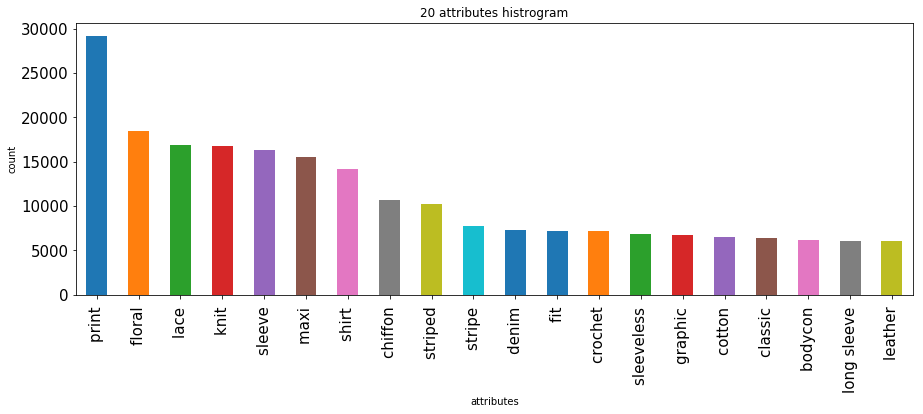

In [18]:
attr_category_frequency_sort[:20].plot(kind = 'bar', figsize=(15,5), fontsize = 15)
plt.title("20 attributes histrogram")
plt.xlabel("attributes")
plt.ylabel("count")

In [19]:
shirt_attr_frequency = (df_shirt_attr_combined.iloc[:,3:] == 1).sum(axis=0)
shirt_attr_frequency_sort=shirt_attr_frequency.sort_values(ascending = False)
print(shirt_attr_frequency_sort)

shirt                      11542
print                      11291
sleeve                      9825
knit                        8264
graphic                     6359
striped                     5745
floral                      5431
muscle                      5403
chiffon                     5358
lace                        4960
stripe                      4106
long sleeve                 3702
pocket                      3493
cotton                      3460
crochet                     3274
v-neck                      3153
boxy                        3136
sleeveless                  2898
classic                     2849
crop                        2567
love                        2448
sheer                       2335
pink                        2252
summer                      2247
printed                     2234
red                         2197
crew                        2156
racerback                   2141
collar                      1991
abstract                    1962
          

In [20]:
jumper_attr_frequency = (df_jumper_attr_combined.iloc[:,3:] == 1).sum(axis=0)
jumper_attr_frequency_sort=jumper_attr_frequency.sort_values(ascending = False)
print(jumper_attr_frequency_sort)

leather               175
faux                  145
quilted               138
faux leather          123
hooded                114
zip                    96
canvas                 77
cotton                 71
collar                 71
fur                    26
trim                   21
sleeve                 20
moto                   18
ribbed                 16
faux fur               14
biker                  13
knit                   12
shearling              12
red                    12
long sleeve            11
hood                   11
leather quilted        11
leather moto           10
classic                 9
new york                9
pocket                  9
york                    9
polo                    9
faux leather moto       8
button                  8
                     ... 
loyal                   0
low-rise skinny         0
mesh-trimmed            0
miami                   0
mickey                  0
mickey mouse            0
morning                 0
moon        

In [21]:
jacket_attr_frequency = (df_jacket_attr_combined.iloc[:,3:] == 1).sum(axis=0)
jacket_attr_frequency_sort=jacket_attr_frequency.sort_values(ascending = False)
print(jacket_attr_frequency_sort)

knit                          3967
faux                          2711
leather                       2394
collar                        2157
hooded                        2128
sleeve                        2064
print                         1987
shawl                         1647
denim                         1574
button                        1401
longline                      1396
floral                        1371
faux leather                  1303
classic                       1302
fur                           1136
moto                          1053
collarless                    1038
open-front                     973
draped                         934
faux fur                       926
striped                        925
lace                           904
zip                            866
long sleeve                    840
textured                       832
quilted                        825
dolman                         700
oversized                      696
cotton              

In [22]:
winterJacket_attr_frequency = (df_winterJacket_attr_combined.iloc[:,3:] == 1).sum(axis=0)
winterJacket_attr_frequency_sort=winterJacket_attr_frequency.sort_values(ascending = False)
print(winterJacket_attr_frequency_sort)

faux                 300
hooded               266
fur                  254
faux fur             206
puffer               140
shearling             81
hood                  79
trim                  67
faux shearling        66
corduroy              59
quilted               42
double-breasted       36
trench                32
belted                29
collar                27
leather               21
cotton                16
oversized             15
shopping              14
slim                  13
drawstring            12
zip                   10
york                   9
sleeve                 9
new york               9
fit                    8
trimmed                8
button                 7
red                    6
leopard                6
                    ... 
mandala print          0
mid-rise               0
mina                   0
neckline               0
modernist              0
neck striped           0
neck skater            0
neck ribbed            0
nautical striped       0


In [23]:
count = 0
for i,winterjacket in enumerate(winterJacket_attr_frequency_sort):
    if winterJacket_attr_frequency_sort[i] == 0:
        count = count + 1
        #print(winterJacket_attr_frequency_sort[i])
print(count)

826


In [24]:
winterJacket_attr_frequency_sort[0]

300

In [25]:
coat_attr_frequency = (df_coat_attr_combined.iloc[:,3:] == 1).sum(axis=0)
coat_attr_frequency_sort= coat_attr_frequency.sort_values(ascending = False)
print(coat_attr_frequency_sort)

trench               110
faux                  70
fur                   67
faux fur              65
woven                 65
textured              55
denim                 51
plaid                 29
button                24
wash                  22
sleeve                19
hooded                17
washed                17
collar                16
tweed                 14
long sleeve           14
oversized             12
acid                  11
leather               11
cotton                10
acid wash             10
belted                 9
pink                   7
red                    6
classic                6
print                  6
two-tone               6
love                   5
island                 5
new york               4
                    ... 
mandala print          0
mid-rise               0
mina                   0
neck striped           0
morning                0
neck skater            0
neck ribbed            0
nautical striped       0
nautical stripe        0


In [26]:
dress_attr_frequency = (df_dress_attr_combined.iloc[:,3:] == 1).sum(axis=0)
dress_attr_frequency_sort=dress_attr_frequency.sort_values(ascending = False)
print(dress_attr_frequency_sort)

maxi                  12600
print                 12033
lace                   9900
floral                 9828
bodycon                5761
shift                  4805
chiffon                4297
sleeve                 4276
fit                    4169
flare                  4133
sleeveless             3626
sheath                 3078
floral print           3027
crochet                2959
embroidered            2904
strapless              2892
midi                   2833
knit                   2817
summer                 2550
pleated                2547
striped                2495
cami                   2347
stripe                 2300
a-line                 2155
red                    2141
mini                   2053
cutout                 2043
party                  2025
pink                   1930
shirt                  1889
                      ...  
high-rise skinny          0
high-rise                 0
cami crop                 0
heathered v-neck          0
classic cotton      

In [27]:
pants_attr_frequency = (df_pants_attr_combined.iloc[:,3:] == 1).sum(axis=0)
pants_attr_frequency_sort=pants_attr_frequency.sort_values(ascending = False)
print(pants_attr_frequency_sort)

skinny                   4317
denim                    2682
wash                     2676
print                    2400
drawstring               1842
distressed               1523
classic                  1515
capri                    1465
fit                      1420
slim                     1415
acid                     1215
cotton                   1098
yoga                     1011
acid wash                 973
knit                      948
rise                      939
stretch                   865
chino                     800
ankle                     788
leather                   785
light                     695
ripped                    661
dark                      636
boyfriend                 636
floral                    630
cargo                     621
pocket                    609
printed                   603
woven                     544
performance               533
                         ... 
classic crew neck           0
faux-wrap                   0
print shif

In [28]:
skirt_attr_frequency = (df_skirt_attr_combined.iloc[:,3:] == 1).sum(axis=0)
skirt_attr_frequency_sort=skirt_attr_frequency.sort_values(ascending = False)
print(skirt_attr_frequency_sort)

pencil                     2674
maxi                       1883
pleated                    1465
print                      1449
midi                       1327
floral                     1174
lace                        895
leather                     839
denim                       814
knit                        775
a-line                      768
mini                        679
faux                        675
faux leather                623
striped                     586
slit                        403
skater                      384
stripe                      377
chiffon                     375
polka dot                   336
dot                         315
summer                      306
pink                        301
crochet                     301
paisley                     293
red                         285
floral print                284
bodycon                     275
textured                    265
stretch                     251
                           ... 
mickey m

In [188]:
sleeve = set(df_attr_category_combined.loc[df_attr_category_combined['sleeve '] == 1]['image_name'])

In [189]:
longsleeve = set(df_attr_category_combined.loc[df_attr_category_combined['long sleeve '] == 1]['image_name'])

In [194]:
sleeveless = set(df_attr_category_combined.loc[df_attr_category_combined['sleeveless '] == 1]['image_name'])

In [199]:
bellsleeve = set(df_attr_category_combined.loc[df_attr_category_combined['bell-sleeve '] == 1]['image_name'])

In [192]:
len(sleeve & longsleeve)

6096

In [193]:
len(longsleeve)

6096

In [195]:
len(sleeve & sleeveless)

142

In [196]:
len(sleeveless)

6876

In [197]:
len(sleeve)

16321

In [201]:
len(sleeve & bellsleeve)

14

In [202]:
len(sleeve & set(df_attr_category_combined.loc[df_attr_category_combined['cap-sleeve '] == 1]['image_name']))

30